In [1]:
import os
import boto3
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IEX_API_KEY = os.getenv('IEX_API_KEY')

Need to load in tickers and make request to API

In [3]:
tickers = [
            'JPM',
            'BAC',
            'C',
            'WFC',
            'GS',
            ]
ticker_string = ''

for ticker in tickers:
    ticker_string += ticker
    ticker_string += ','
    
ticker_string = ticker_string[:-1]

#Create the endpoint and years strings
endpoints = 'chart'
years = '5'

#Interpolate the endpoint strings into the HTTP_request string
HTTP_request = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={ticker_string}&types={endpoints}&range={years}y&token={IEX_API_KEY}'

In [4]:
bank_data = pd.read_json(HTTP_request)

In [5]:
pd.DataFrame(bank_data['JPM']['chart'])

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,99.51,99.89,98.7301,99.280,2017-10-20,JPM,15326608,HISTORICAL_PRICES,JPM,,...,98.7301,15326608,87.1147,87.3165,87.6500,86.6322,15326608,"Oct 20, 17",0.00,0.0000
1,99.34,99.99,99.2400,99.510,2017-10-23,JPM,9238624,HISTORICAL_PRICES,JPM,,...,99.2400,9238624,87.3165,87.1674,87.7377,87.0796,9238624,"Oct 23, 17",-0.17,-0.0017
2,100.92,101.19,99.7600,99.880,2017-10-24,JPM,13000801,HISTORICAL_PRICES,JPM,,...,99.7600,13000801,87.6412,88.5538,88.7907,87.5359,13000801,"Oct 24, 17",1.58,0.0159
3,101.02,101.45,100.1900,101.250,2017-10-25,JPM,14632741,HISTORICAL_PRICES,JPM,,...,100.1900,14632741,88.8433,88.6415,89.0188,87.9132,14632741,"Oct 25, 17",0.10,0.0010
4,101.74,102.42,101.3200,101.350,2017-10-26,JPM,13054361,HISTORICAL_PRICES,JPM,,...,101.3200,13054361,88.9311,89.2733,89.8700,88.9047,13054361,"Oct 26, 17",0.72,0.0071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,109.37,109.90,101.7600,101.980,2022-10-13,JPM,22398706,HISTORICAL_PRICES,JPM,,...,101.7600,22398706,101.9800,109.3700,109.9000,101.7600,22398706,"Oct 13, 22",5.76,0.0556
1254,111.19,115.24,110.7240,111.962,2022-10-14,JPM,33420141,HISTORICAL_PRICES,JPM,,...,110.7240,33420141,111.9620,111.1900,115.2400,110.7240,33420141,"Oct 14, 22",1.82,0.0166
1255,115.86,117.01,114.3200,115.410,2022-10-17,JPM,22276272,HISTORICAL_PRICES,JPM,,...,114.3200,22276272,115.4100,115.8600,117.0100,114.3200,22276272,"Oct 17, 22",4.67,0.0420
1256,118.84,120.14,116.9600,119.660,2022-10-18,JPM,21539680,HISTORICAL_PRICES,JPM,,...,116.9600,21539680,119.6600,118.8400,120.1400,116.9600,21539680,"Oct 18, 22",2.98,0.0257


In [6]:
series_list = []

for ticker in tickers:
    series_list.append(pd.DataFrame(bank_data[ticker]['chart'])['close'])

series_list.append(pd.DataFrame(bank_data['JPM']['chart'])['date'])

column_names = tickers.copy()
column_names.append('Date')

bank_data = pd.concat(series_list, axis=1)
bank_data.columns = column_names

bank_data.set_index('Date', inplace = True)

([<matplotlib.axis.XTick at 0x1457ba890>,
 [Text(1, 0, 'JPM'),
  Text(2, 0, 'BAC'),
  Text(3, 0, 'C'),
  Text(4, 0, 'WFC'),
  Text(5, 0, 'GS')])

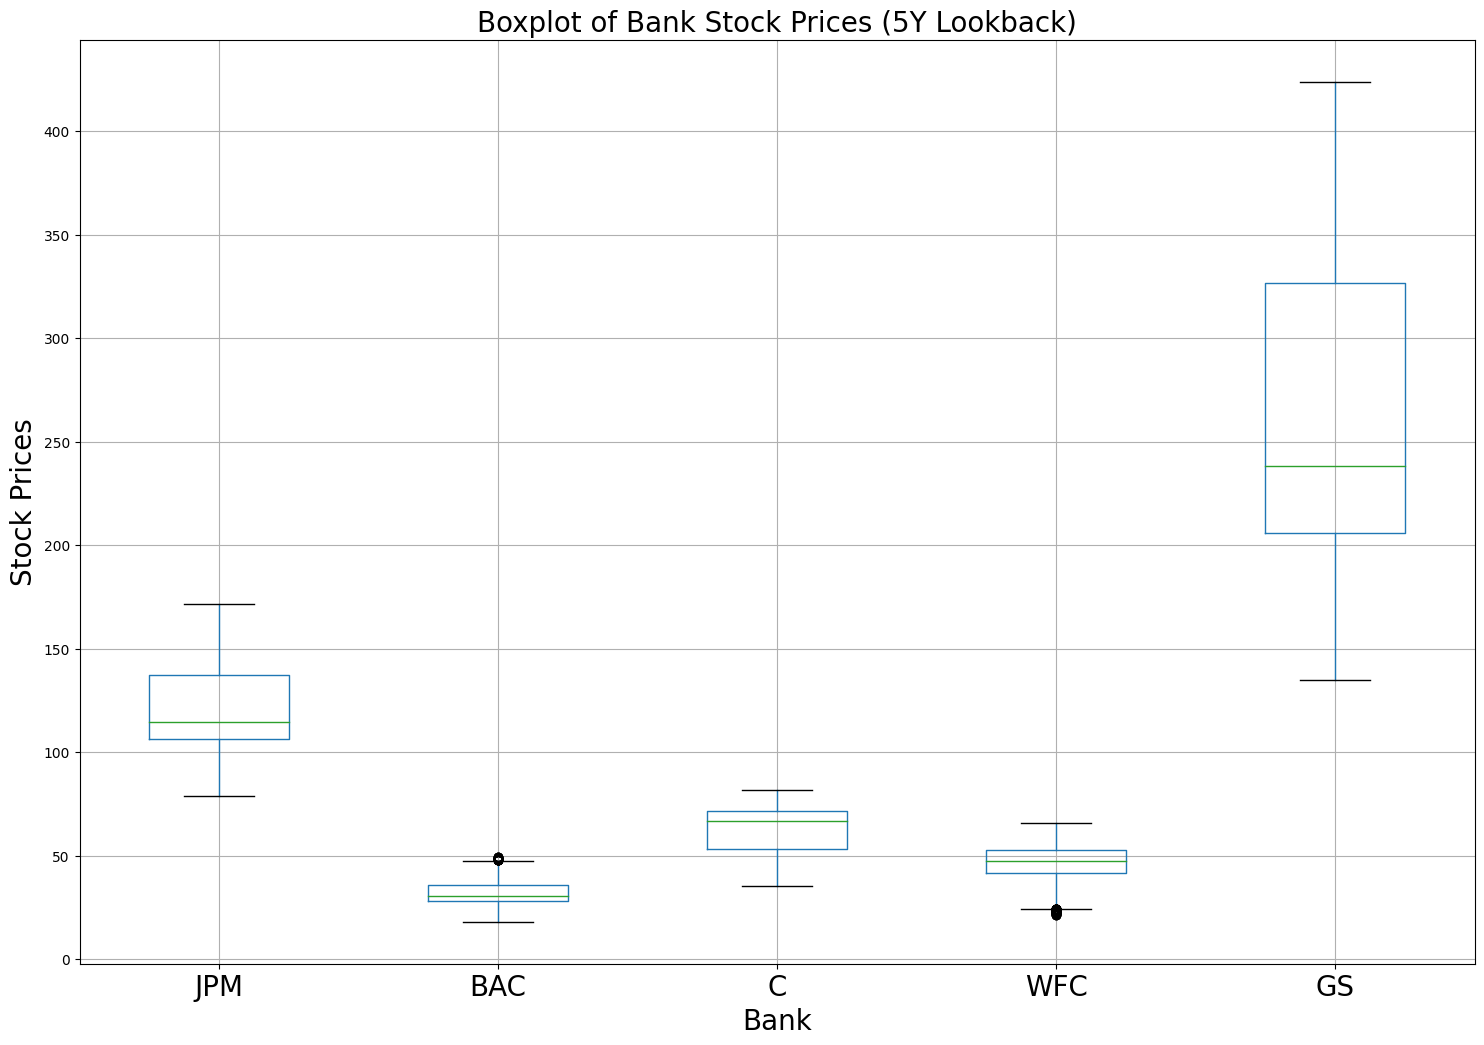

In [7]:
plt.figure(figsize = (18,12))

#Generate the boxplot
bank_data.boxplot().plot()

#Add titles to the chart and axes
plt.title('Boxplot of Bank Stock Prices (5Y Lookback)', fontsize = 20)
plt.xlabel('Bank', fontsize = 20)
plt.ylabel('Stock Prices', fontsize = 20)

#Add labels to each individual boxplot on the canvas
ticks = range(1, len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(ticks,labels, fontsize = 20)

GS outperformed all while BAC performed the worst.

Text(0.5, 0, 'Date')

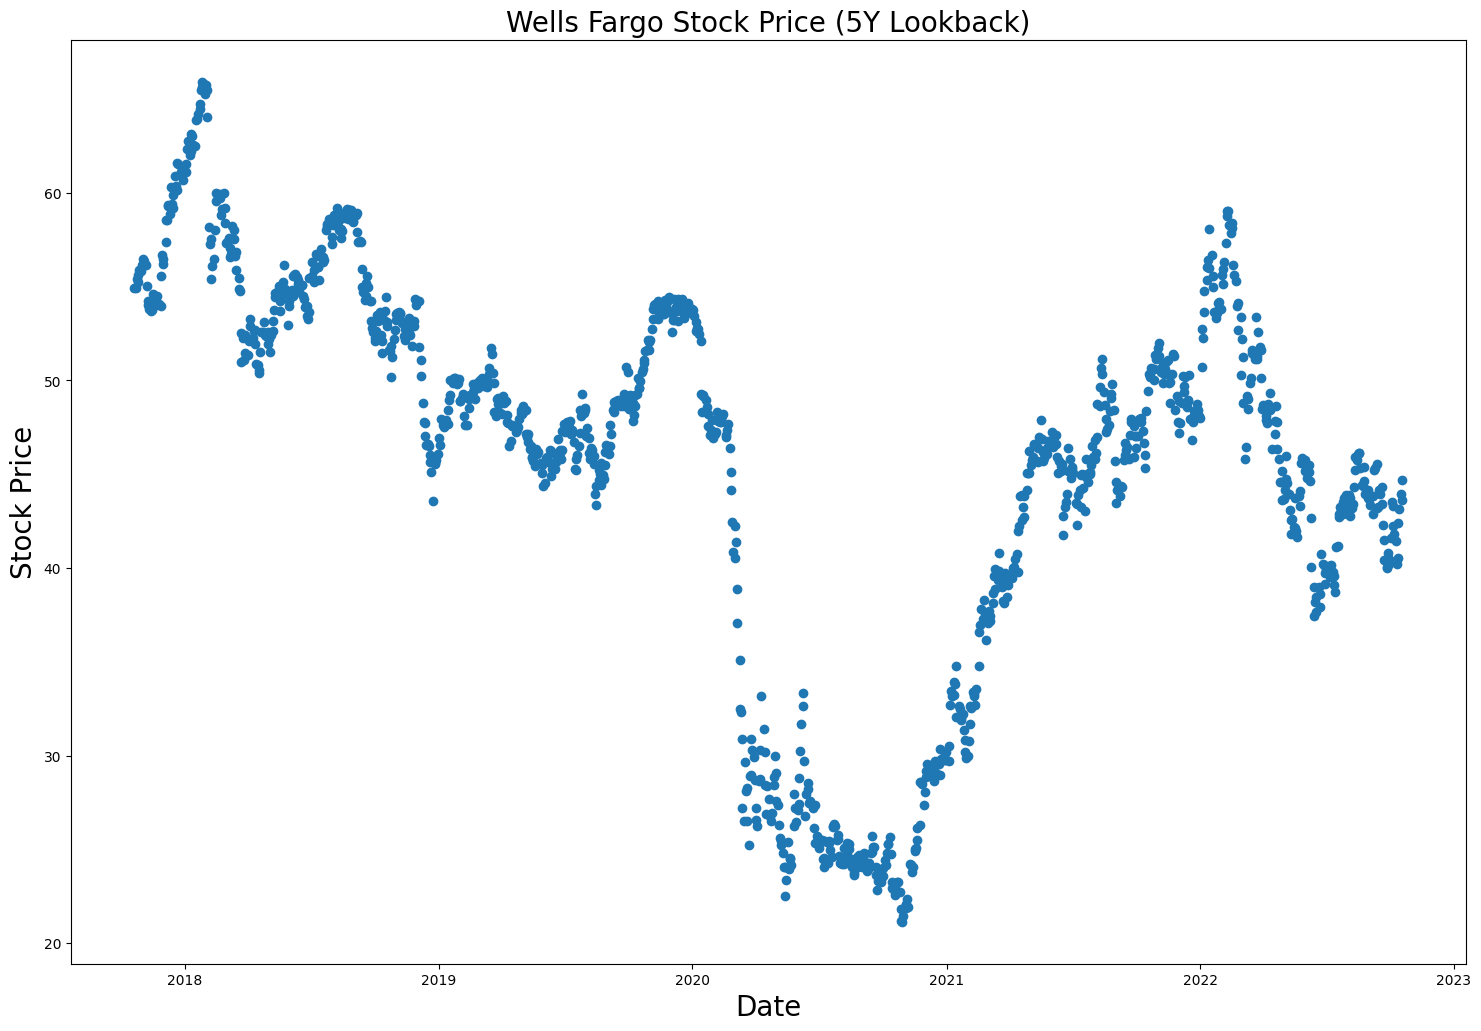

In [8]:
plt.figure(figsize = (18,12))
dates = bank_data.index.to_series()
dates = [pd.to_datetime(d) for d in dates]
WFC_ticker = bank_data['WFC']
plt.scatter(dates,WFC_ticker)
plt.title("Wells Fargo Stock Price (5Y Lookback)", fontsize=20)
plt.ylabel("Stock Price", fontsize=20)
plt.xlabel("Date", fontsize=20)

Text(0.5, 0, 'Stock Prices')

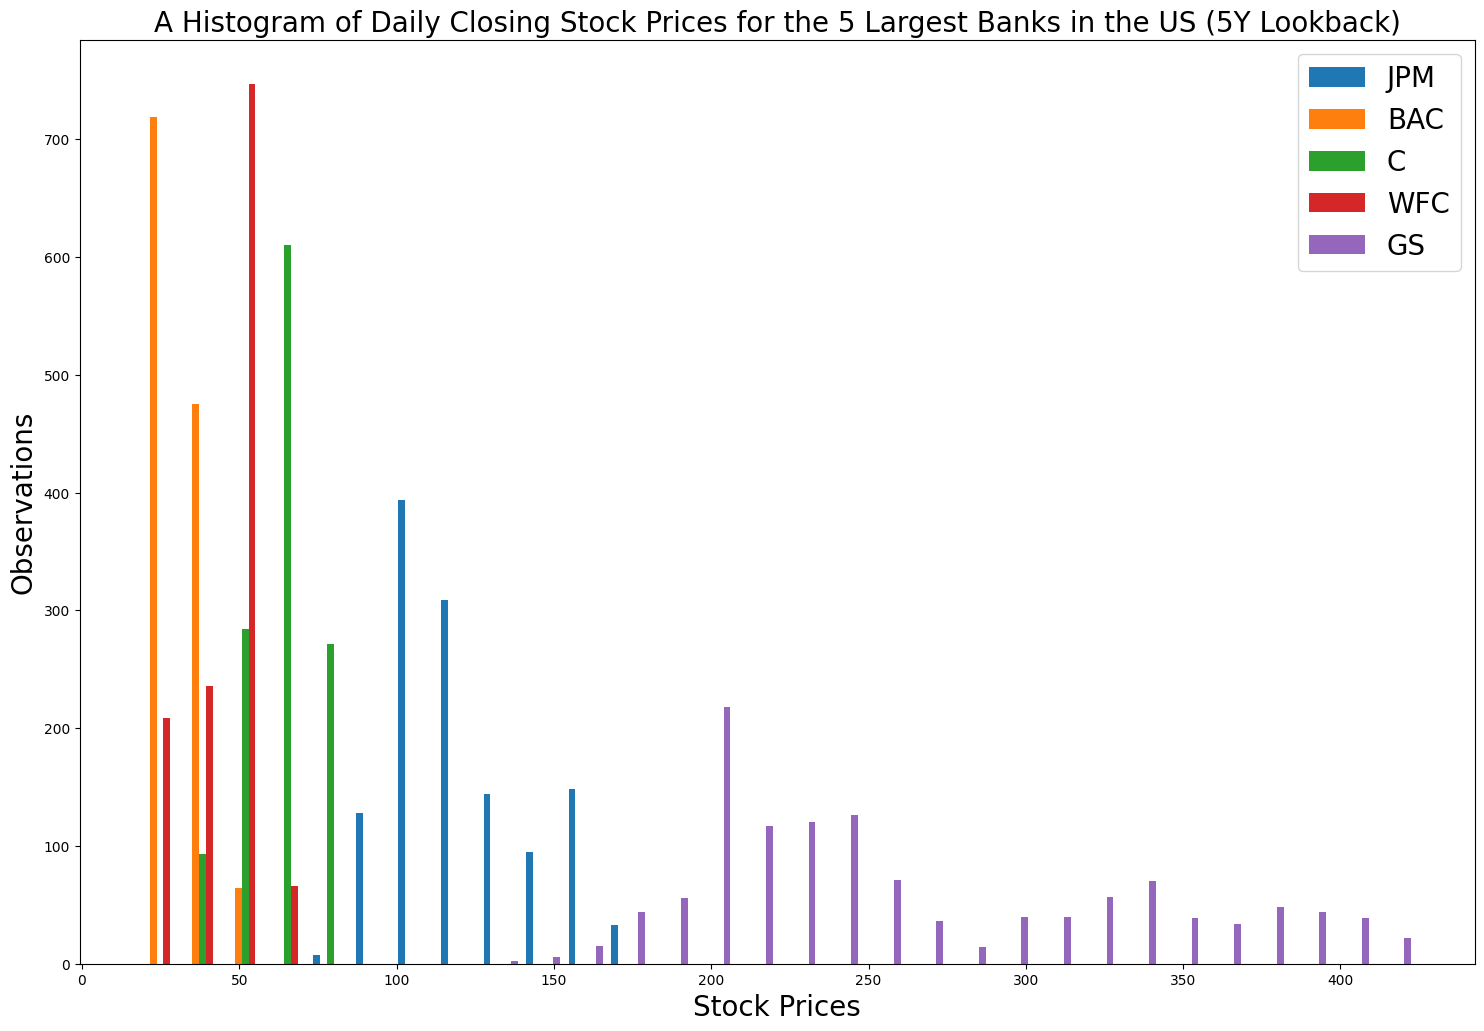

In [9]:
plt.figure(figsize = (18,12))
plt.hist(bank_data,bins=30)
plt.legend(bank_data.columns,fontsize=20)
plt.title("A Histogram of Daily Closing Stock Prices for the 5 Largest Banks in the US (5Y Lookback)", fontsize = 20)
plt.ylabel("Observations", fontsize = 20)
plt.xlabel("Stock Prices", fontsize = 20)

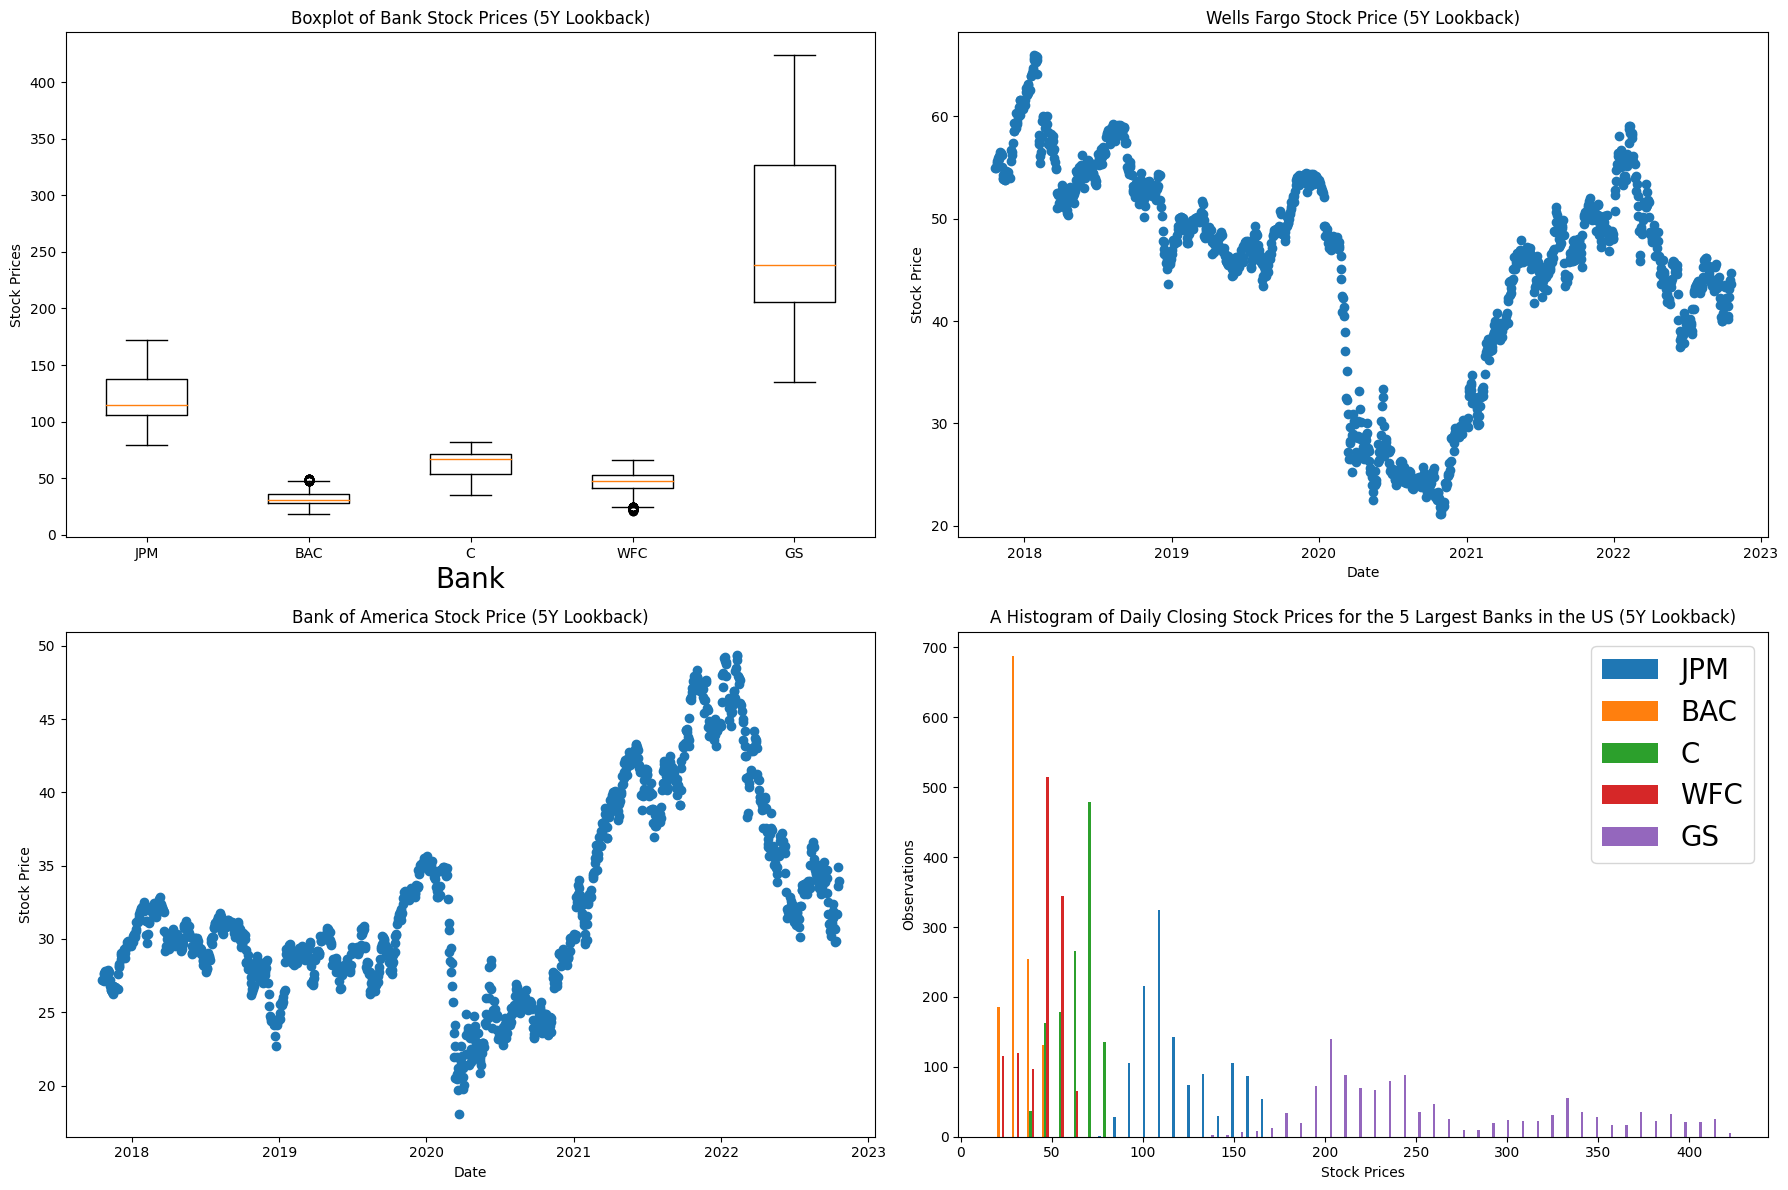

In [10]:
plt.figure(figsize = (18,12))

plt.subplot(2,2,1)

#Generate the boxplot
plt.boxplot(bank_data)

#Add titles to the chart and axes
plt.title('Boxplot of Bank Stock Prices (5Y Lookback)')
plt.xlabel('Bank', fontsize = 20)
plt.ylabel('Stock Prices')

#Add labels to each individual boxplot on the canvas
ticks = range(1, len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(ticks,labels)

########################
#Subplot 2
########################
plt.subplot(2,2,2)

#Create the x-axis data
dates = bank_data.index.to_series()
dates = [pd.to_datetime(d) for d in dates]

#Create the y-axis data
WFC_stock_prices =  bank_data['WFC']

#Generate the scatterplot
plt.scatter(dates, WFC_stock_prices)

#Add titles to the chart and axes
plt.title("Wells Fargo Stock Price (5Y Lookback)")
plt.ylabel("Stock Price")
plt.xlabel("Date")

########################
#Subplot 3
########################
plt.subplot(2,2,3)

#Create the x-axis data
dates = bank_data.index.to_series()
dates = [pd.to_datetime(d) for d in dates]

#Create the y-axis data
BAC_stock_prices =  bank_data['BAC']

#Generate the scatterplot
plt.scatter(dates, BAC_stock_prices)

#Add titles to the chart and axes
plt.title("Bank of America Stock Price (5Y Lookback)")
plt.ylabel("Stock Price")
plt.xlabel("Date")

########################
#Subplot 4
########################
plt.subplot(2,2,4)

#Generate the histogram
plt.hist(bank_data, bins = 50)

#Add a legend to the histogram
plt.legend(bank_data.columns,fontsize=20)

#Add titles to the chart and axes
plt.title("A Histogram of Daily Closing Stock Prices for the 5 Largest Banks in the US (5Y Lookback)")
plt.ylabel("Observations")
plt.xlabel("Stock Prices")

plt.tight_layout()
plt.savefig('bank_data.png')

In [11]:
#Export to s3 bucket
s3 = boto3.resource('s3')
s3.meta.client.upload_file('bank_data.png', 'niko-jupyter-bucket', 'bank_data.png', ExtraArgs={'ACL':'public-read'})